In [ ]:
import torch
import matplotlib.pyplot as plt

In [6]:
# Synthetic dataset

N = 200
centers = torch.Tensor([[-1., -1.], [1., 1.]])
X_train = torch.randn((N, 2))*0.2
X_train[:N//2] += centers[0]
X_train[N//2:] += centers[1]
# shuffling
X_train = X_train[torch.randperm(N)]

In [19]:
class KMean():
    def __init__(self, K:int, X:torch.Tensor):
        assert len(X.shape) == 2
        self.K = K
        self.X = X # dataset
        self.N, self.x_dim = X.shape

        # Random initialization
        self.centers = X[torch.randperm(self.N)[:K]] # K, x_dim

    def _assign_clusters(self):
        distances = torch.cdist(self.X, self.centers, p=2)
        self.cluster_id = torch.argmin(distances, dim=1)

    def _update_centers(self):
        for k in range(self.K):
            pts = self.X[self.cluster_id == k]
            if pts.shape[0] > 0:
                self.centers[k] = pts.mean(dim=0)
        
    def fit(self, num_iter:int = 100):
        for i in range(num_iter):
            self._assign_clusters()
            self._update_centers()

model = KMean(K=3, X=X_train)
model.fit(1)

In [16]:

def plot_clustering(model, X):
    # Convert centroids and labels back to numpy for plotting
    centroids_np = model.centers.detach().numpy()
    labels_np = model.cluster_id.detach().numpy()

    # Plot the clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels_np, cmap='viridis')
    plt.scatter(centroids_np[:, 0], centroids_np[:, 1], s=300, c='red', label='Centroids')
    plt.title('K-Means Clustering in PyTorch')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

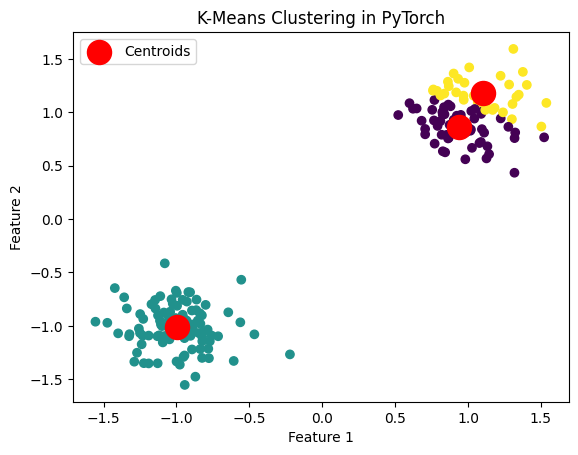

In [20]:
plot_clustering(model, X_train)

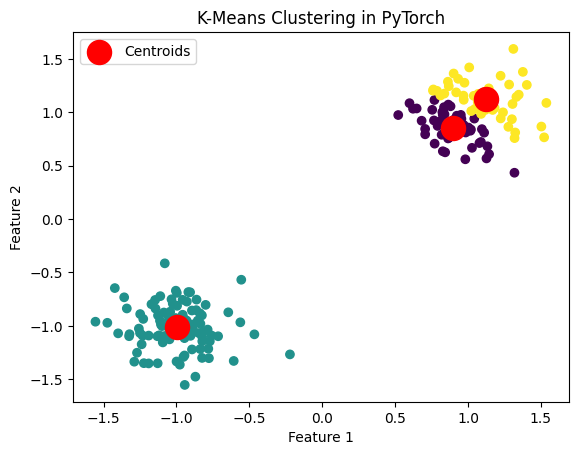

In [21]:
model.fit(10)
plot_clustering(model, X_train)